In [8]:
# Importamos pandas para el análisis de datos tabulares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords


In [36]:
df_reviews = pd.read_csv('../Datasets/reviews_sentiment_analysis.csv')

In [10]:
df_reviews.describe(include='all')

,funny,last_edited,item_id,helpful,recommend,review,posted
count,8151,6140,59305.000000,59305,59305,59305.000000,59280
unique,185,1014,NaN,1344,2,NaN,1905
top,1 person found this review funny,"Last edited November 25, 2013.",NaN,No ratings yet,True,NaN,2014-06-21
freq,5180,99,NaN,30168,52473,NaN,225
mean,NaN,NaN,169935.176511,NaN,NaN,1.417132,NaN
std,NaN,NaN,132029.464174,NaN,NaN,0.688145,NaN
min,NaN,NaN,10.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,8930.000000,NaN,NaN,1.000000,NaN
50%,NaN,NaN,218230.000000,NaN,NaN,2.000000,NaN
75%,NaN,NaN,261760.000000,NaN,NaN,2.000000,NaN


In [11]:

# Conteo de valores únicos en la columna 'review' 
# Recordemos que la columna 'review' contiene datos provistos por un analisis de sentimientos hecho a las reseñas del juego
conteo_reviews = df_reviews['review'].value_counts()

# Calcula el porcentaje de cada valor único
porcentaje = (conteo_reviews / len(df_reviews)) * 100

# Creamos un nuevo DataFrame para mostrar los resultados
df_sentimientos_conteo = pd.DataFrame({'Sentimientos': conteo_reviews.index, 'Conteo': conteo_reviews.values, 'Porcentaje': porcentaje.values})

# Muestra el DataFrame con los conteos y porcentajes
print(df_sentimientos_conteo)

# en Sentimientos '0' es malo, '1' es neutro, '2' es positivo


   Sentimientos  Conteo  Porcentaje
0             2   31570   53.233286
1             1   20903   35.246607
2             0    6832   11.520108


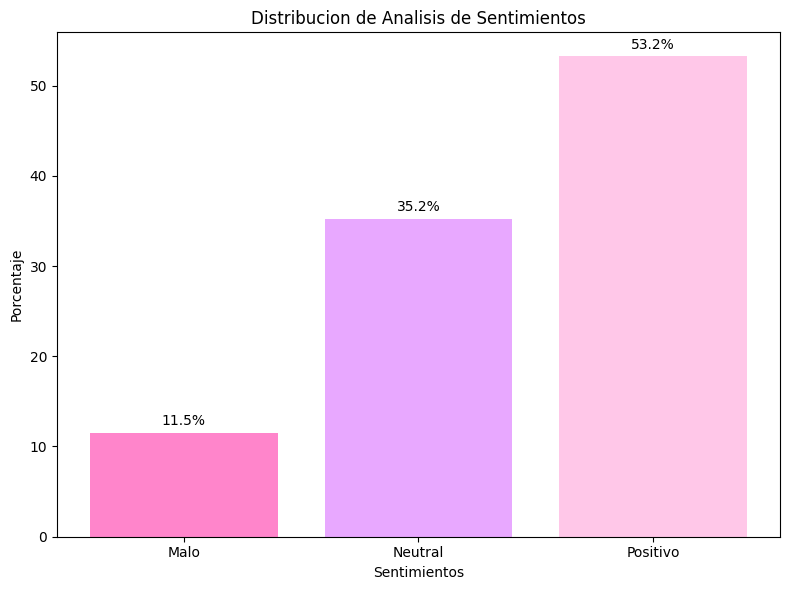

In [27]:
# Ordenamos el DataFrame por los valores de 'Sentimientos'
df_sentimientos_conteo = df_sentimientos_conteo.sort_values(by='Sentimientos')

# Paleta de colores con tonos de lilas y rosas
colors = ['#FF85CB', '#E8A8FF', '#FFC7E8']

# Grafica los porcentajes de cada valor único
plt.figure(figsize=(8, 6))
bars = plt.bar(df_sentimientos_conteo['Sentimientos'], df_sentimientos_conteo['Porcentaje'], color= colors)

# Agregamos etiquetas a las columnas para cada valor
plt.xlabel('Sentimientos')
plt.ylabel('Porcentaje')
plt.title('Distribucion de Analisis de Sentimientos')
plt.xticks(rotation=45)
# Define las etiquetas para las columnas debajo de cada barra
plt.xticks(ticks=[0, 1, 2], labels=['Malo', 'Neutral', 'Positivo'], rotation=0)

# Agregamos los porcentajes sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



En este caso, se analizó como positivas aquellas reseñas con polaridad positiva y recomendación positiva, neutras a las reseñas con polaridad igual o inferior a 0 y recomendación positiva, y malas a las reseñas con polaridad negativa y recomendación negativa. Teniendo esto en cuenta, los sentimientos de los usuarios se manifestaron de la siguiente manera:

La alta proporción de sentimientos positivos, 53.2%, indica que la mayoría de los usuarios están contentos con los juegos o experiencias proporcionadas.
Las reseñas neutras también son significativas, con un 35.2%, lo que sugiere que algunos usuarios tienen opiniones mixtas o no expresan una opinión clara sobre los juegos, aunque sí los recomendarían.
Las reseñas negativas, con un 11.5%, aunque menos comunes, son importantes para identificar áreas de mejora y abordar posibles problemas que los usuarios puedan estar experimentando.

Nube de palabras frecuentes en Reviews :

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


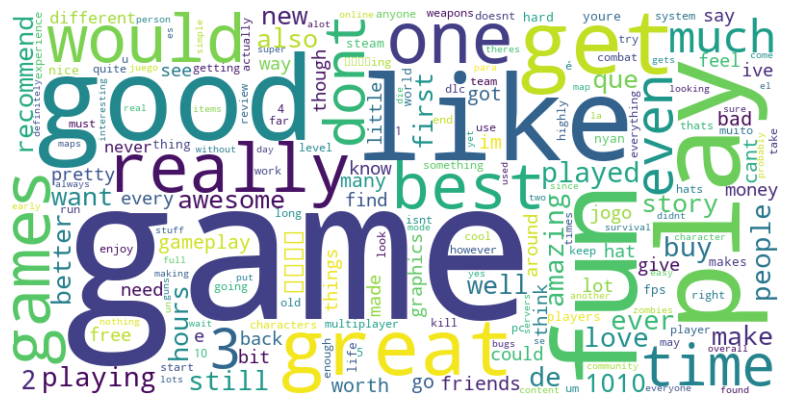

In [10]:
# Descargamos la lista de stopwords
nltk.download('stopwords')

# Obtenemos la lista en inglés
stop_words = set(stopwords.words('english'))

df_reviews = pd.read_csv('../Datasets/reviews.csv')

# Limpiamos y tokenizamos el texto de la columna review, excluyendo stopwords
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    tokens = text.split()  # Tokenizar el texto
    tokens = [word for word in tokens if word not in stop_words]  # Filtrar stopwords
    return tokens

# Contamos las palabras que se repiten en la columna review
words_counter = Counter()
for review in df_reviews['review']:
    words_counter.update(clean_text(str(review)))

# Mostrar las 10 palabras más comunes como ejemplo
#print(words_counter.most_common(10))

# Creamos la nube de palabras con colores personalizados
cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(words_counter)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Las palabras más frecuentes en las reviews son :

'game': 58409 veces \
'like': 10537 veces \
'good': 10319 veces \
'play': 10038 veces \
'fun': 9976 veces \
'get': 9467 veces \
'great': 8753 veces \
'one': 7285 veces \
'really': 6676 veces \
'would': 6499 veces 

Esto nos da una idea de los términos más utilizados en las revisiones de juegos. Algunas conclusiones posibles podrían ser: 

1- Énfasis en la experiencia del juego: Palabras como 'game', 'play', 'fun' y 'great' sugieren que los jugadores están centrados en la experiencia general del juego y en cómo les divierte o les entretiene. \
2- Calidad percibida: Palabras como 'good', 'great' y 'really' indican que los jugadores están evaluando la calidad del juego y expresando su satisfacción con aspectos específicos. \
3- Comparaciones y opiniones personales: 'Like', 'would' y 'one' sugieren que los jugadores pueden estar haciendo comparaciones entre juegos o expresando sus preferencias personales. \
4- Expresiones de acción y logro: 'Get' podría estar asociado con logros, recompensas o acciones dentro del juego, lo que indica un enfoque en las mecánicas o la jugabilidad. 

Estas conclusiones son generales y pueden variar dependiendo del contexto específico de las revisiones y los juegos analizados. Es importante analizar más a fondo las revisiones y los datos para obtener una comprensión más completa de las opiniones y tendencias de los jugadores.

In [28]:

# Contar los valores únicos en la columna 'recommend'
valores_unicos = df_reviews['recommend'].value_counts()

# Calcular los porcentajes de cada valor único
porcentajes = (valores_unicos / len(df_reviews)) * 100

# Crear un nuevo DataFrame para mostrar los resultados
df_recommend_conteo = pd.DataFrame({'Recomendaciones': valores_unicos.index, 'Conteo': valores_unicos.values, 'Porcentaje': porcentajes.values})

# Mostrar el DataFrame con los conteos y porcentajes
print(df_recommend_conteo)


   Recomendaciones  Conteo  Porcentaje
0             True   52473   88.479892
1            False    6832   11.520108


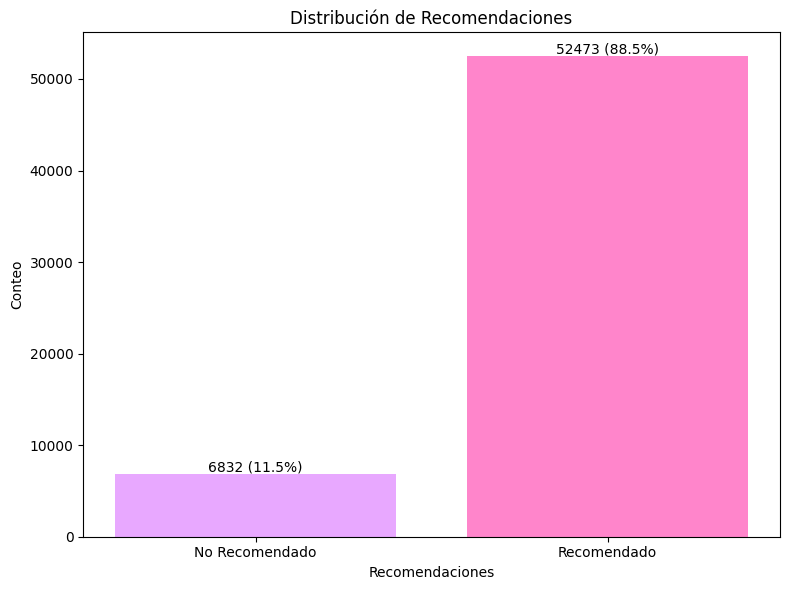

In [32]:
import matplotlib.pyplot as plt

# Paleta de colores con tonos lilas
colors = ['#FF85CB', '#E8A8FF']

# Graficar los conteos de cada valor único
plt.figure(figsize=(8, 6))
bars = plt.bar(df_recommend_conteo['Recomendaciones'], df_recommend_conteo['Conteo'], color=colors)

# Agregar etiquetas y título al gráfico
plt.xlabel('Recomendaciones')
plt.ylabel('Conteo')
plt.title('Distribución de Recomendaciones')

# Agregar porcentajes sobre las barras
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval} ({df_recommend_conteo.iloc[i]["Porcentaje"]:.1f}%)', ha='center', va='bottom', fontsize=10)

# Definir las etiquetas para las columnas debajo de cada barra
plt.xticks(ticks=[0, 1], labels=['No Recomendado', 'Recomendado'], rotation=0)

plt.tight_layout()
plt.show()



la alta proporción de recomendaciones positivas es una señal positiva en términos de satisfacción del usuario, pero también es crucial abordar las recomendaciones negativas para mejorar continuamente y mantener la experiencia positiva de los usuarios en la plataforma de juegos.

Cantidad de Reseñas por Año

In [38]:

# Convertimos la columna 'posted' a tipo datetime 
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'])

# Extraemos el año de la columna 'posted' y crear una nueva columna 'year'
df_reviews['year'] = df_reviews['posted'].dt.year

# Eliminamos filas con valores no válidos en la columna 'year'
df_reviews = df_reviews.dropna(subset=['year'])

# Convertimos la columna 'year' a tipo entero
df_reviews['year'] = df_reviews['year'].astype(int)

# Contamos las reviews por año
reviews_por_año = df_reviews['year'].value_counts().sort_index()

print(reviews_por_año)



year
2010       66
2011      532
2012     1215
2013     6792
2014    22111
2015    18470
2016    10094
Name: count, dtype: int64


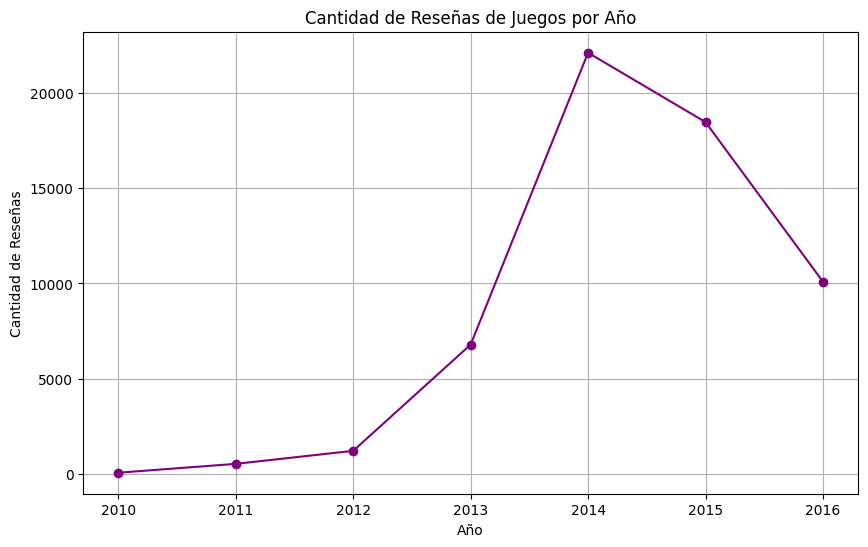

In [56]:

# Datos de reseñas por año
años = reviews_por_año.index
reseñas = reviews_por_año.values

# Crear el gráfico de connected scatter plot
plt.figure(figsize=(10, 6))
plt.plot(años, reseñas, marker='o', linestyle='-', color= 'purple')

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Reseñas de Juegos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.grid(True)

# Mostrar el gráfico
plt.show()


